In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fake_df=pd.read_csv("/content/Fake.csv.zip")

In [ ]:
true_df=pd.read_csv("/content/True.csv.zip")

In [ ]:
fake_df.sample(5)

,title,text,subject,date
11633,"“MIC DROP!” A Lady Approached Sheriff Clarke, ...",Here is his epic response to her criticism: La...,politics,"Feb 17, 2017"
13591,YOU CAN ADD INSIDER TRADING To The List Of Hil...,Wow! Yet more insider deals with the Clinton G...,politics,"Jul 2, 2016"
12823,HEY #NFL…CAN YOU HEAR US NOW? Monday Night Foo...,The #NFL has become a showcase for an anti-law...,politics,"Oct 5, 2016"
19218,WOW! REFUGEES EXPOSED: Here’s the cold hard tr...,Brigitte Gabriel is an intelligent and importa...,left-news,"Jan 31, 2017"
15091,Hillary Clinton’s Forked Tongue Answer On E-Ma...,Remember when Slick Willy said It depends on ...,politics,"Oct 14, 2015"


In [ ]:
fake_df.sample(5)

,title,text,subject,date
7013,Representative Barletta says he discussed beco...,NEW YORK (Reuters) - Republican congressman Lo...,politicsNews,"November 29, 2016"
20637,EU must be part of U.S. Middle East peace push...,TALLINN (Reuters) - Israelis and Palestinians ...,worldnews,"September 8, 2017"
18094,Erdogan says Turkey backing FSA move on Idlib,ANKARA (Reuters) - Turkish President Tayyip Er...,worldnews,"October 7, 2017"
11365,Myanmar police to free journalists working for...,(Reuters) - Myanmar police said on Tuesday the...,worldnews,"December 26, 2017"
3452,Trump's Paris decision followed debate between...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 1, 2017"


In [ ]:
fake_df.shape, true_df.shape

((23481, 4), (21417, 4))

**Checking the missing values**

In [ ]:
print("Missing values in Fake News:")
print(fake_df.isnull().sum())

print("\nMissing values in Real News:")
print(true_df.isnull().sum())


Missing values in Fake News:
title      0
text       0
subject    0
date       0
dtype: int64

Missing values in Real News:
title      0
text       0
subject    0
date       0
dtype: int64


there is no missing values

**checking the duplicate values**

In [ ]:
print("Fake News Duplicates:", fake_df.duplicated().sum())
print("Real News Duplicates:", true_df.duplicated().sum())


Fake News Duplicates: 3
Real News Duplicates: 206


**removing of the duplicate values**

In [ ]:
fake_df = fake_df.drop_duplicates()
true_df = true_df.drop_duplicates()


**Add a label column**

In [ ]:
fake_df['label'] = 0
true_df['label'] = 1


In [ ]:
fake_df = fake_df.drop(columns=['date', 'subject'])
true_df = true_df.drop(columns=['date', 'subject'])


**Concatenate the data**

In [ ]:

data = pd.concat([fake_df, true_df], ignore_index=True)

In [ ]:
data.sample(5)

,title,text,label
37337,PM Hariri urges Lebanese to put country first,BEIRUT (Reuters) - Prime Minister Saad al-Hari...,1
20195,"DIRTY, VIOLENT, DIVIDED AND CORRUPT: Disgusted...",Hey Democrats If you can t even host a 4-day c...,0
35841,EU tells Netanyahu it rejects Trump's Jerusale...,BRUSSELS/CAIRO (Reuters) - Prime Minister Benj...,1
36870,"Bolivian president welcomes, opposition slams ...",LA PAZ (Reuters) - Bolivia s socialist Preside...,1
14778,FOX NEWS REPORTER ASKS MAYOR Why She’s Using T...,The drip drip drip of the Left ensuring Christ...,0


In [ ]:
data['content'] =  data['text']


In [ ]:
data.sample(5)

,title,text,label,content
26696,U.S. Defense Dept needs to better manage its f...,WASHINGTON (Reuters) - The U.S. Defense Depart...,1,WASHINGTON (Reuters) - The U.S. Defense Depart...
41624,Catalan head says already feels like the presi...,MADRID (Reuters) - The regional leader of Cata...,1,MADRID (Reuters) - The regional leader of Cata...
1500,FBI Tells Trump To Go F*ck Himself For Firing...,Donald Trump was hoping to visit the FBI for a...,0,Donald Trump was hoping to visit the FBI for a...
25895,Hundreds of counties at risk for no Obamacare ...,NEW YORK (Reuters) - With Republican efforts t...,1,NEW YORK (Reuters) - With Republican efforts t...
34719,"Gunman opens fire in Moscow pastry factory, ki...",MOSCOW (Reuters) - A gunman opened fire in a p...,1,MOSCOW (Reuters) - A gunman opened fire in a p...


In [ ]:
# View a specific row by index (e.g., row 0)
index = 0  # You can change this to any index number

print("TITLE:\n", data.loc[index, 'title'])
print("\nTEXT:\n", data.loc[index, 'text'])
print("\nLABEL (0 = Fake, 1 = Real):", data.loc[index, 'label'])


TITLE:
  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing

TEXT:
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s gree

In [ ]:
data = data.drop(columns=['title', 'text'])


In [ ]:
print(data.head())
print(data.columns)


   label                                            content
0      0  Donald Trump just couldn t wish all Americans ...
1      0  House Intelligence Committee Chairman Devin Nu...
2      0  On Friday, it was revealed that former Milwauk...
3      0  On Christmas day, Donald Trump announced that ...
4      0  Pope Francis used his annual Christmas Day mes...
Index(['label', 'content'], dtype='object')


In [ ]:
# View a specific row (e.g., row 10)
index = 10
print(data.loc[index, 'content'])
print("Label:", data.loc[index, 'label'])


A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down a

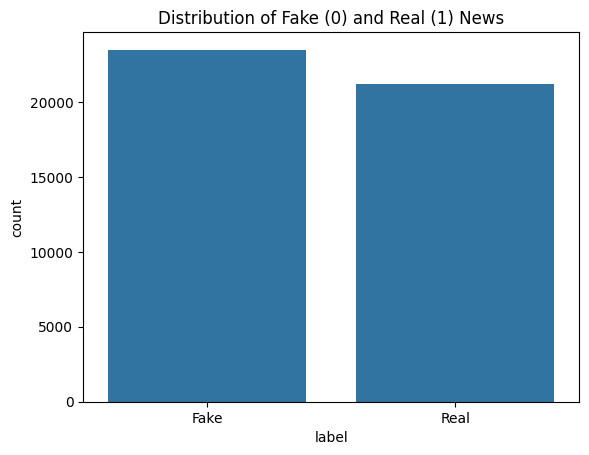

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=data)
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


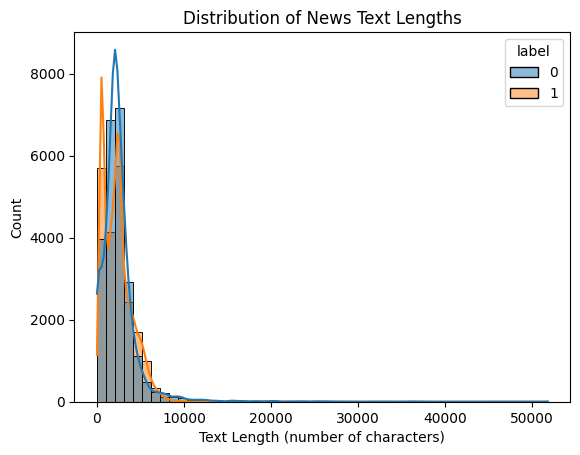

In [ ]:
# Add a column for text length
data['text_length'] = data['content'].apply(len)

sns.histplot(data=data, x='text_length', hue='label', bins=50, kde=True)
plt.title("Distribution of News Text Lengths")
plt.xlabel("Text Length (number of characters)")
plt.ylabel("Count")
plt.show()


**Distribution of text length by class (Fake vs Real)**

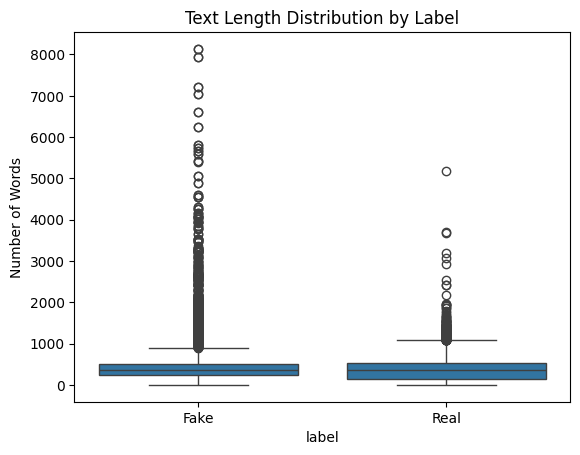

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['text_length'] = data['content'].apply(lambda x: len(x.split()))

sns.boxplot(x='label', y='text_length', data=data)
plt.title("Text Length Distribution by Label")
plt.xticks([0,1], ['Fake', 'Real'])
plt.ylabel("Number of Words")
plt.show()


**Top frequent words in Fake vs Real**

In [ ]:
from collections import Counter
import pandas as pd

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).split()
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Top 20 in Fake
print("Top 20 Words in Fake News")
print(get_top_n_words(data[data['label']==0]['content'], 20))

# Top 20 in Real
print("\nTop 20 Words in Real News")
print(get_top_n_words(data[data['label']==1]['content'], 20))


Top 20 Words in Fake News
     Word  Frequency
0     the     483175
1      to     286008
2      of     233175
3     and     213054
4       a     202858
5      in     152830
6    that     138406
7       s     127620
8      is     105549
9     for      88386
10     on      76950
11    was      66426
12  Trump      64844
13     he      62174
14   with      60663
15    his      55840
16     it      53932
17     as      51534
18     be      47469
19     by      45786

Top 20 Words in Real News
    Word  Frequency
0    the     417530
1     to     240876
2     of     201938
3      a     184943
4    and     177279
5     in     167447
6     on     103487
7   that      81560
8    for      76976
9   said      71157
10   The      54355
11    is      53812
12  with      52408
13   was      47122
14    by      46370
15   has      45435
16    as      44607
17     s      43801
18    he      42955
19  from      38487


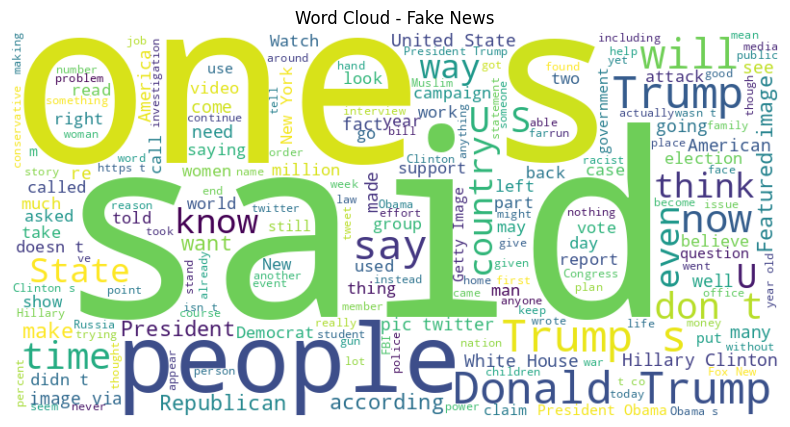

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text for fake news
fake_text = " ".join(data[data['label'] == 0]['content'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News")
plt.show()


In [ ]:
data['label'].value_counts(normalize=True)


,proportion
label,
0,0.525364
1,0.474636


**This is not a significant class imbalance — both classes are relatively well-balanced (close to 50-50). This is a good situation**

**Check for duplicate articles**

In [ ]:
duplicates = data.duplicated(subset='content').sum()
print(f"Duplicate articles: {duplicates}")


Duplicate articles: 0


In [ ]:
content_label_counts = duplicate_articles.groupby('content')['label'].nunique()
inconsistent = content_label_counts[content_label_counts > 1]
print(f"Inconsistent duplicates (same content, different labels): {len(inconsistent)}")


NameError: name 'duplicate_articles' is not defined

**Creating a new feature**

In [ ]:
# Group duplicates by content and view groups with more than 1 occurrence
duplicate_groups = data[data.duplicated(subset='content', keep=False)]
duplicate_sets = duplicate_groups.groupby('content').filter(lambda x: len(x) > 1)
duplicate_sets.sort_values(by='content').head(10)  # Show sample


,label,content,text_length,clean_content


In [ ]:
data = data.drop_duplicates(subset='content', keep='first')
print(f"New shape after removing duplicates: {data.shape}")


New shape after removing duplicates: (38646, 4)


In [ ]:
data.sample(5)

,label,content,text_length
11482,0,I m a political refugee from Iran. I ve been ...,143
8715,0,Ever since President Obama made history with a...,741
30109,1,TOKYO (Reuters) - The Kremlin said on Friday t...,152
28839,1,"WASHINGTON (Reuters) - President Donald Trump,...",913
9797,0,"Dear Mike Tomlin, James Harrison, Ben Roethlis...",643


**Preprocessing**

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet data (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data['clean_content'] = data['content'].apply(preprocess_text)


In [ ]:
final_data = data[['clean_content',"text_length"]]


In [ ]:
final_data.sample()

Text Vectorization **(TF-IDF)**
Convert text into numerical format that ML models can understand

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # or use stop_words='english'
X_tfidf = tfidf_vectorizer.fit_transform(data['clean_content'])  # use your cleaned text column


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
text_length_scaled = scaler.fit_transform(data[['text_length']])  # must be 2D

# Convert to sparse matrix for compatibility with X_tfidf
from scipy.sparse import csr_matrix
text_length_sparse = csr_matrix(text_length_scaled)


In [ ]:
text_length_scaled

array([[0.06084819],
       [0.03749232],
       [0.07129687],
       ...,
       [0.0393362 ],
       [0.02519975],
       [0.02581438]])

In [ ]:
text_length_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 38644 stored elements and shape (38646, 1)>

In [ ]:
from scipy.sparse import hstack

X_combined = hstack([X_tfidf, text_length_sparse])


In [ ]:
y = data['label']


In [ ]:
print(X_combined)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6636815 stored elements and shape (38646, 5001)>
  Coords	Values
  (0, 1351)	0.04942048026187974
  (0, 4633)	0.12106031811024412
  (0, 2433)	0.0764122058850221
  (0, 1042)	0.08009808376905111
  (0, 4926)	0.22900366063469155
  (0, 169)	0.10242350073295114
  (0, 202)	0.02813527873785644
  (0, 2010)	0.2539002439653058
  (0, 2975)	0.20152887226739874
  (0, 4976)	0.2952494775930654
  (0, 214)	0.133274981350705
  (0, 2549)	0.034002159947197755
  (0, 2359)	0.02269587600755698
  (0, 350)	0.02540564567096835
  (0, 4488)	0.0409010786942689
  (0, 2273)	0.03169599003998592
  (0, 2039)	0.11258011113153589
  (0, 1990)	0.030975470472827074
  (0, 4547)	0.13072771717007636
  (0, 1905)	0.02959867461524687
  (0, 3131)	0.016672160167841198
  (0, 2091)	0.054125022511801894
  (0, 1496)	0.248563230309503
  (0, 4489)	0.11861330793722061
  (0, 4762)	0.06985154968625867
  :	:
  (38645, 4583)	0.18848303744375108
  (38645, 637)	0.0780170136544053
  (38

**ML models**

1.   Naive Bayes
2.   Logistic Regression



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5303241 stored elements and shape (30916, 5001)>
  Coords	Values
  (0, 1351)	0.031013325406263517
  (0, 4633)	0.028488819458884186
  (0, 214)	0.08960932961484011
  (0, 2359)	0.02136385313151754
  (0, 4547)	0.17579328061375862
  (0, 2091)	0.025474210189049322
  (0, 4489)	0.1202404892724425
  (0, 3128)	0.1135672211088517
  (0, 1054)	0.03997027898751331
  (0, 3049)	0.03552844174060679
  (0, 3390)	0.0279584492977381
  (0, 1951)	0.11441252841008165
  (0, 200)	0.09550629235547027
  (0, 3600)	0.14931195782824794
  (0, 4984)	0.035716578412384646
  (0, 2718)	0.08174000309773868
  (0, 2207)	0.01792418837185687
  (0, 1841)	0.023525573328887245
  (0, 4135)	0.07084922481595847
  (0, 1350)	0.045133592212415155
  (0, 2343)	0.040716285566439886
  (0, 2024)	0.02309668939045679
  (0, 290)	0.025574567466709937
  (0, 3008)	0.023418615589636618
  (0, 4882)	0.03114147072846558
  :	:
  (30915, 2344)	0.07982494185427758
  (30915, 833)	0.03935242183

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Text Preprocessing & Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Train-Test Split
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb}")

# Cross-validation
cv_scores_nb = cross_val_score(nb_model, X_combined, y, cv=5)
print("NB Cross-validation scores:", cv_scores_nb)
print("NB Mean CV accuracy:", cv_scores_nb.mean())


Naive Bayes Accuracy: 0.9349288486416559
NB Cross-validation scores: [0.91888745 0.90852633 0.86401863 0.9237935  0.89610558]
NB Mean CV accuracy: 0.9022662986815503


In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_test_lr = lr_model.predict(X_test)
y_pred_train_lr = lr_model.predict(X_train)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_test_lr)
print(f"Logistic Regression  test Accuracy: {acc_lr}")
acc_lr = accuracy_score(y_train, y_pred_train_lr)
print(f"Logistic Regression  train Accuracy: {acc_lr}")

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_combined, y, cv=5)
print("LR Cross-validation scores:", cv_scores_lr)
print("LR Mean CV accuracy:", cv_scores_lr.mean())


Logistic Regression  test Accuracy: 0.9855109961190168
Logistic Regression  train Accuracy: 0.9889701125630741
LR Cross-validation scores: [0.98163001 0.98576789 0.9736059  0.96972441 0.95691551]
LR Mean CV accuracy: 0.9735287455036113


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],     # regularization strength
    'penalty': ['l1', 'l2'],     # norm used in penalization
    'solver': ['liblinear']      # 'liblinear' works with l1 & l2
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid.fit(X_test, y_test)

print("🔍 Best Parameters:", grid.best_params_)
print("✅ Best Accuracy (CV):", grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l1, solve

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


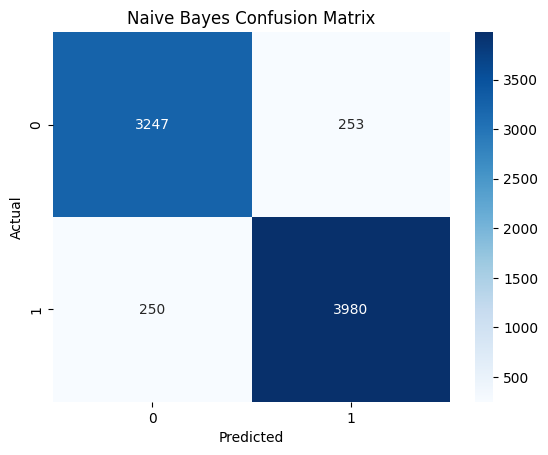

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3500
           1       0.94      0.94      0.94      4230

    accuracy                           0.93      7730
   macro avg       0.93      0.93      0.93      7730
weighted avg       0.93      0.93      0.93      7730



In [ ]:
# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


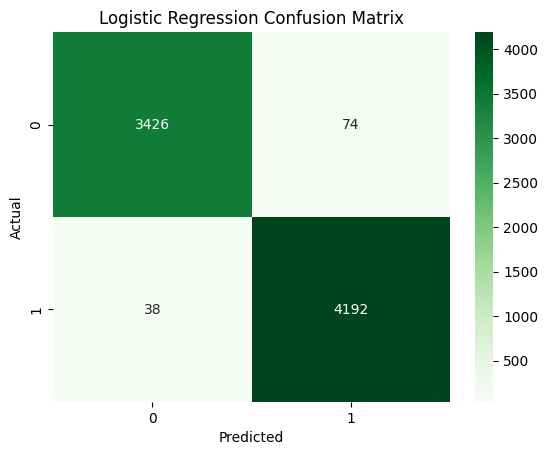

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3500
           1       0.98      0.99      0.99      4230

    accuracy                           0.99      7730
   macro avg       0.99      0.98      0.99      7730
weighted avg       0.99      0.99      0.99      7730



In [ ]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_test_lr))


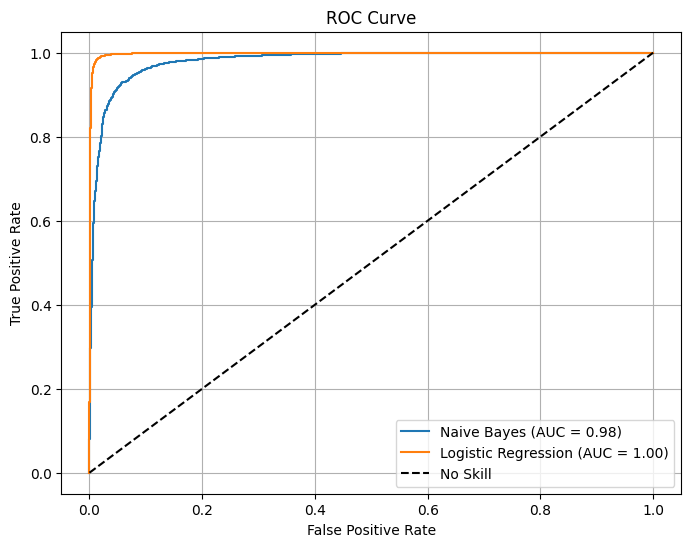

In [ ]:
# Predict probabilities
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# ROC curves
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, lr_model.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_lr))


Train Accuracy: 0.9889701125630741
Test Accuracy : 0.9855109961190168


In [ ]:
# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
pip install xgboost


In [ ]:
# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 2. SVM
svm_model = SVC(kernel='linear', probability=True)  # Use linear kernel for text data
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


--- Random Forest ---
Accuracy: 0.9943078913324709
Confusion Matrix:
 [[3476   24]
 [  20 4210]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3500
           1       0.99      1.00      0.99      4230

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730

ROC AUC Score: 0.9993431273218507
--- SVM ---
Accuracy: 0.9914618369987064
Confusion Matrix:
 [[3459   41]
 [  25 4205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3500
           1       0.99      0.99      0.99      4230

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730

ROC AUC Score: 0.9991651469098278
--- XGBoost ---
Accuracy: 0.9967658473479948
C

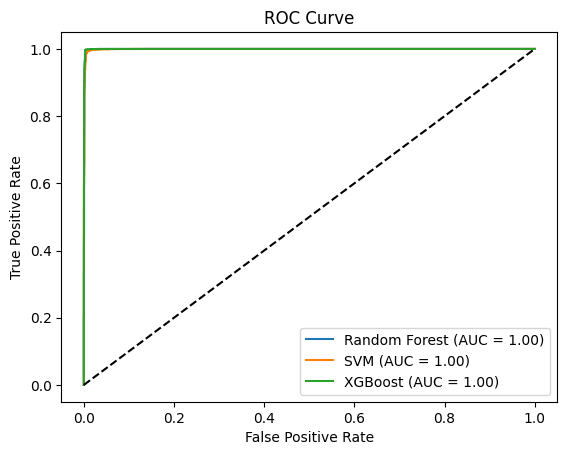

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

models = {
    'Random Forest': (rf_model, y_pred_rf),
    'SVM': (svm_model, y_pred_svm),
    'XGBoost': (xgb_model, y_pred_xgb)
}

for name, (model, y_pred) in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ROC AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print("ROC AUC Score:", auc)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**DL models**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


In [ ]:
final_data.sample(5)

,clean_content,text_length
4731,those wacky conservatives are at it again with...,374
29613,washington reuters a violent protest that erup...,67
28327,paintsville kentucky reuters president donald ...,755
36662,peshawar pakistan reuters pakistani taliban gu...,369
24769,falls church va reuters us attorney general je...,352


In [ ]:
y.head(5)

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
pip install gensim
